In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
demfile = '../data/lc.tif'

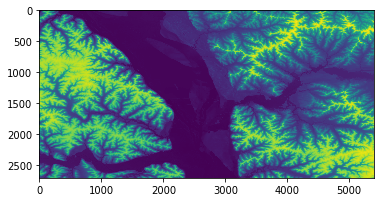

In [3]:
with rasterio.open(demfile) as src:
    img = src.read(1)
plt.imshow(img)

In [4]:
src.meta

{'count': 1,
 'crs': CRS({'init': 'epsg:4269'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 2703,
 'nodata': -3.4028234663852886e+38,
 'transform': Affine(9.2592592593e-05, 0.0, -91.50000000000225,
       0.0, -9.2592592593e-05, 44.000555555555515),
 'width': 5406}

In [6]:
from rasterstats import zonal_stats
from rasterstats.utils import VALID_STATS

In [18]:
polyjs = '/Users/aleaf/Downloads/map (1).geojson'
demfile

'../data/lc.tif'

In [10]:
zonal_stats(polyjs, demfile, stats=['min', 'max', 'std'])

[{'max': 391.2250671386719,
  'min': 221.47837829589844,
  'std': 43.14633343089362},
 {'max': 205.32958984375, 'min': 193.78611755371094, 'std': 1.749043758373772}]

In [9]:
VALID_STATS

['count',
 'min',
 'max',
 'mean',
 'sum',
 'std',
 'median',
 'majority',
 'minority',
 'unique',
 'range',
 'nodata']

In [11]:
import json

In [12]:
with open(polyjs) as input:
    pjs = json.load(input)

In [16]:
pjs['features'][0]

{'geometry': {'coordinates': [[[-91.20368957519531, 43.81198606125742],
    [-91.14498138427734, 43.81198606125742],
    [-91.14498138427734, 43.83700326552683],
    [-91.20368957519531, 43.83700326552683],
    [-91.20368957519531, 43.81198606125742]]],
  'type': 'Polygon'},
 'properties': {},
 'type': 'Feature'}

In [17]:
zonal_stats(pjs['features'][0], demfile)

[{'count': 171814,
  'max': 391.2250671386719,
  'mean': 321.63204395450896,
  'min': 221.47837829589844}]

In [19]:
from shapely.geometry import shape

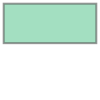

In [25]:
p = shape(pjs['features'][0]['geometry'])
p

In [26]:
zonal_stats(p, demfile)

[{'count': 171814,
  'max': 391.2250671386719,
  'mean': 321.63204395450896,
  'min': 221.47837829589844}]

In [ ]:
            -91.3623046875,
            43.81743624638687
          ],
          [
            -91.11030578613281,
            43.81471121600004

In [28]:
x = np.linspace(-91.36, -91.11, 1000)
y = np.ones(1000, dtype=float)*43.81
points = list(zip(x, y))
points[0:5]

[(-91.359999999999999, 43.810000000000002),
 (-91.359749749749753, 43.810000000000002),
 (-91.359499499499492, 43.810000000000002),
 (-91.359249249249245, 43.810000000000002),
 (-91.358998998998999, 43.810000000000002)]

In [29]:
with rasterio.open(demfile) as src:
    elevs = list(src.sample(points))

In [32]:
elevs = np.squeeze(elevs)
elevs[0:10]

array([ 341.19259644,  342.83328247,  341.75845337,  336.29379272,
        333.20318604,  326.7492981 ,  332.68920898,  335.96755981,
        340.77984619,  344.87084961], dtype=float32)

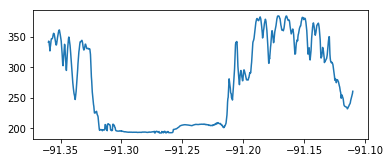

In [37]:
plt.plot(x, elevs)
ax = plt.gca()
ax.set_aspect(.0005)

In [38]:
import pyproj

In [39]:
pr1 = pyproj.Proj('+init=epsg:4269')
pr2 = pyproj.Proj('+init=epsg:26916')

In [47]:
xutm, yutm = pyproj.transform(pr1, pr2, x, y)
dist = xutm - xutm[0]
xutm[:10]

array([ 149312.91094112,  149333.04089192,  149353.17084245,
        149373.30079271,  149393.4307427 ,  149413.56069242,
        149433.69064187,  149453.82059105,  149473.95053996,
        149494.08048859])

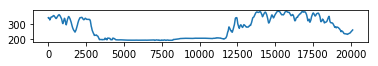

In [48]:
plt.plot(dist, elevs)
ax = plt.gca()
ax.set_aspect(10)